# 서울시 범죄 현황 데이터 시각화

In [41]:
from matplotlib import font_manager

f_path = 'C:/Windows/Fonts/malgun.ttf'
font_manager.FontProperties(fname=f_path).get_name()

'Malgun Gothic'

In [42]:
import matplotlib.pyplot as plt 
from matplotlib import rc 
import seaborn as sns 

rc("font", family='Malgun Gothic')
plt.rcParams["axes.unicode_minus"] = False 
get_ipython().run_line_magic("matplotlib", "inline")

In [10]:
import pandas as pd

crime_anal_norm = pd.read_csv("./result_data/05_crime_anal_norm.csv", index_col=0)
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238,0.876923,84.328112
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010,0.419583,85.255701
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831,0.424407,76.664569
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,608255,911,0.565290,85.623335
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,520929,2109,0.557578,78.710965


### 🔰 상관관계 확인

> pairplot을 이용해 강도, 살인, 폭력에 대한 상관관계를 확인한다.

- kind = {'scatter', 'kde', 'hist', 'reg'} -> regression(회귀)

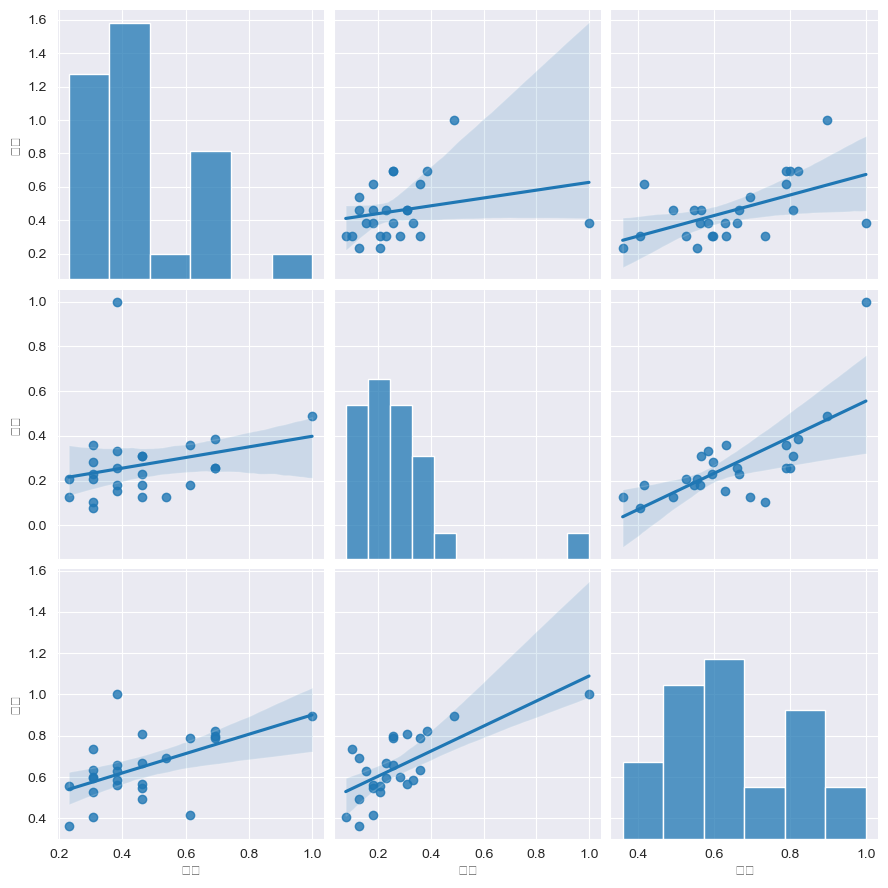

In [40]:
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning)

sns.set_style("darkgrid")
sns.pairplot(data=crime_anal_norm, vars=["살인", "강도", "폭력"], kind="reg", height=3)
plt.show()

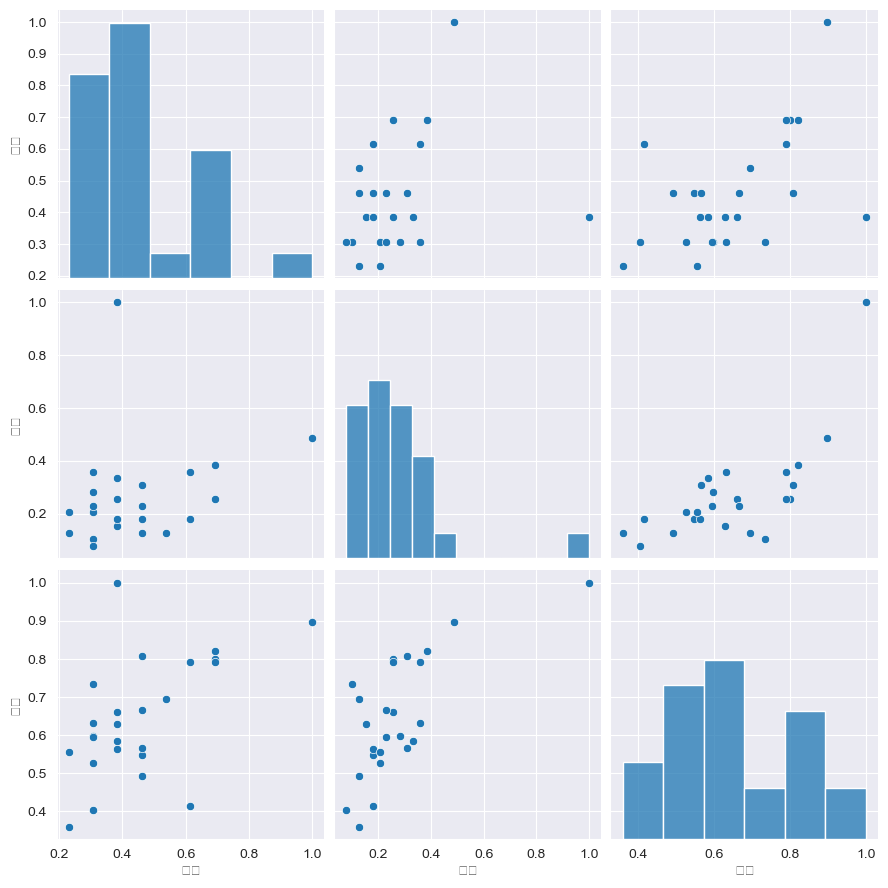

In [27]:
sns.pairplot(data=crime_anal_norm, vars=["살인", "강도", "폭력"], kind="scatter", height=3)
plt.show()

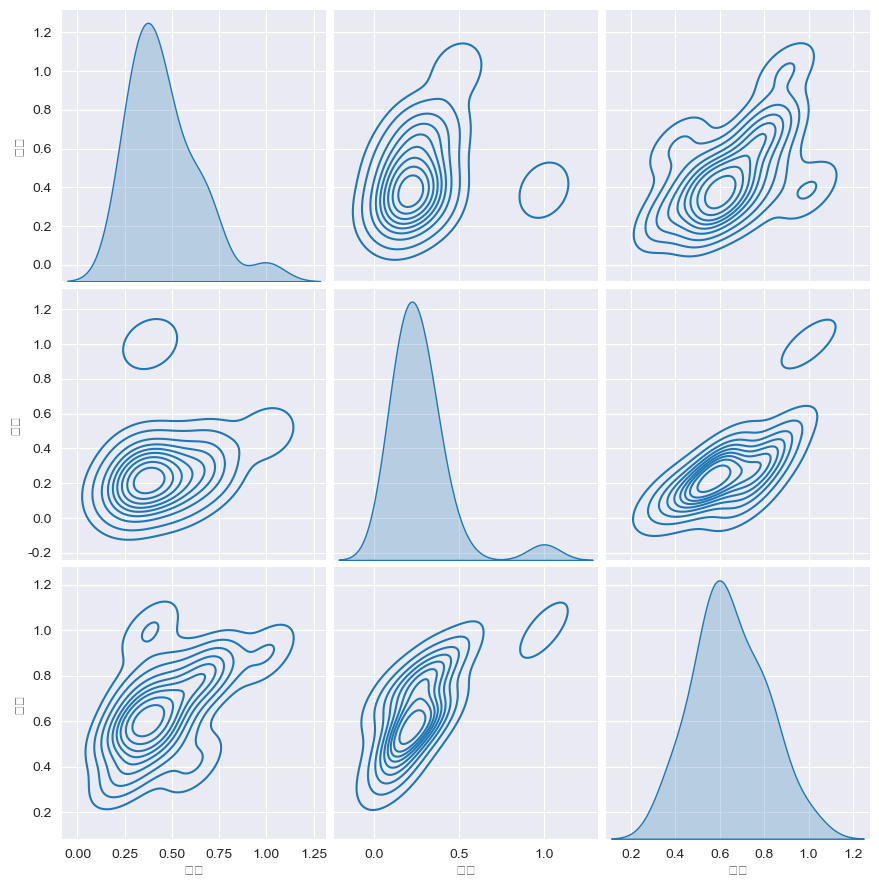

In [28]:
sns.pairplot(data=crime_anal_norm, vars=["살인", "강도", "폭력"], kind="kde", height=3)
plt.show()

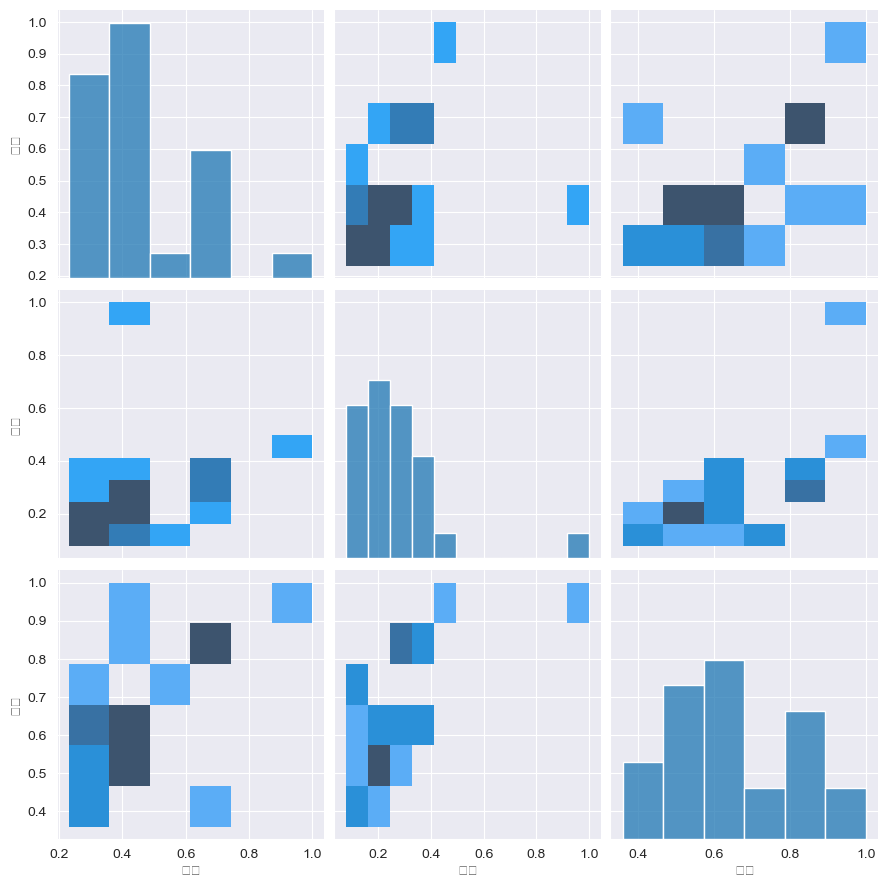

In [29]:
sns.pairplot(data=crime_anal_norm, vars=["살인", "강도", "폭력"], kind="hist", height=3)
plt.show()

### 🔰 "인구수", "CCTV"와 "살인", "강도"의 상관관계 확인

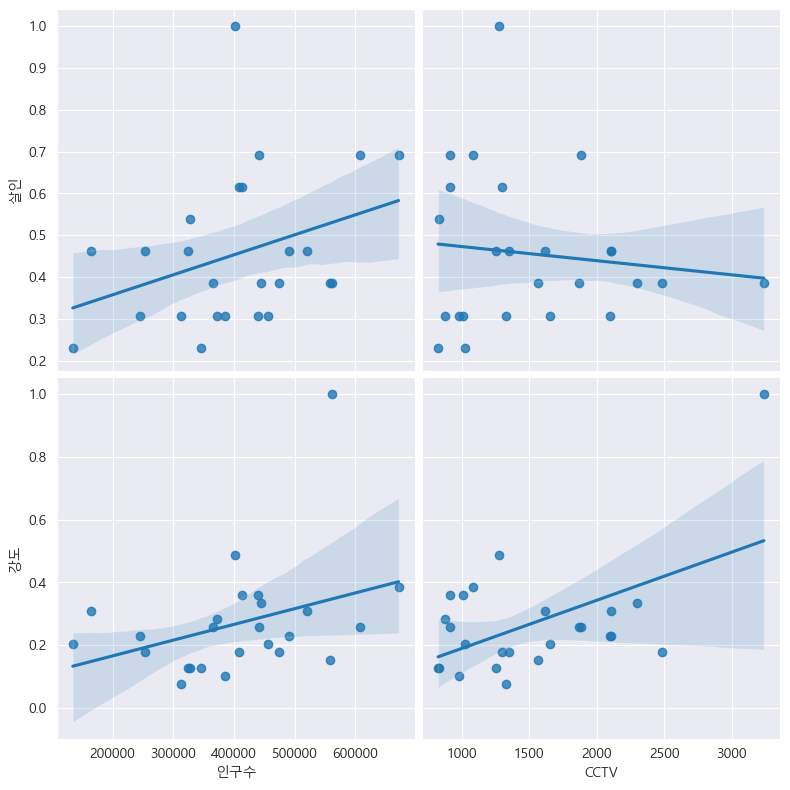

In [22]:
def drawGraph():
    sns.pairplot(
        data=crime_anal_norm, 
        x_vars=["인구수", "CCTV"],
        y_vars=["살인", "강도"],
        kind="reg",
        height=4
    )
    plt.show()
drawGraph()

- 해석1-1. 인구수가 증가하는 것에 비해 강도가 많이 증가한다고 볼 수는 없다.

	(아웃라이어도 존재하며, 이를 제외하면 증가폭은 더욱 줄어들 것이다)

- 해석1-2. 강남3구가 인구수가 많은 곳이라면, 강도 발생 비율이 낮으니까 안전하다고 느낄 수 있지 않을까?

- 해석2-1. 인구수가 증가함에 따라 살인은 증가하는 경향을 보인다. 

- 해석2-2. CCTV가 많이 설치되어 있을수록 강도 사건이 많이 일어난다? 이는 해석의 오류.

	그렇다면 CCTV가 많아서 강도사건이 많이 발생하니까, CCTV를 줄여야한다 라고 연결될 수 있다. 

- 해석2-2. 강도 사건이 많이 발생하는 곳에 CCTV를 많이 설치한 것일 수도 있다. 

- 해석2-2. 아웃라이어를 제외하면, 회귀선이 조금 더 내려가서 해석을 달리 할 수 있는 여지가 있다. 

### 🔰 "인구수", "CCTV"와 "살인검거율", "폭력검거율"의 상관관계 확인

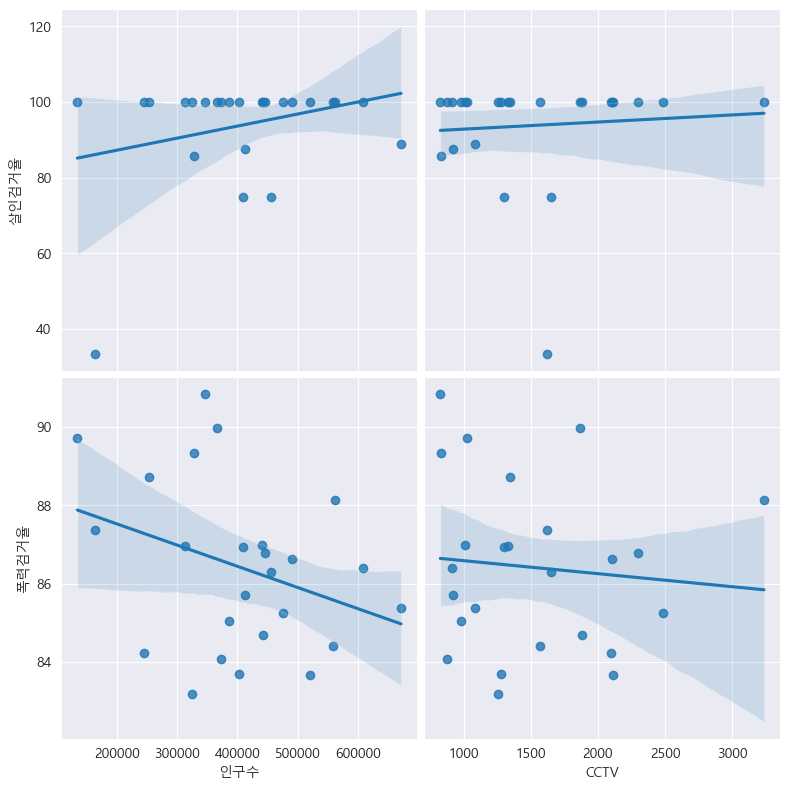

In [35]:
def drawGraph():
    sns.pairplot(
        data=crime_anal_norm, 
        x_vars=["인구수", "CCTV"],
        y_vars=["살인검거율", "폭력검거율"],
        kind="reg",
        height=4
    )
    plt.show()
drawGraph()

- 해석1-1. 인구수가 증가할 수록 폭력검거율이 떨어진다. 
- 해석2-1. 인구수와 살인검거율은 조금 높아지는 것 같은 느낌?
- 해석3-1. CCTV와 살인검거율은 해석하기 애매(100에 모여있는 이유는, 검거율은 100으로 제한했기 때문) 
- 해석4-1. CCTV가 증가할수록 폭력검거율이 약간 하향세를 보인다.

### 🔰 "인구수", "CCTV"와 "절도검거율", "강도검거율"의 상관관계 확인¶

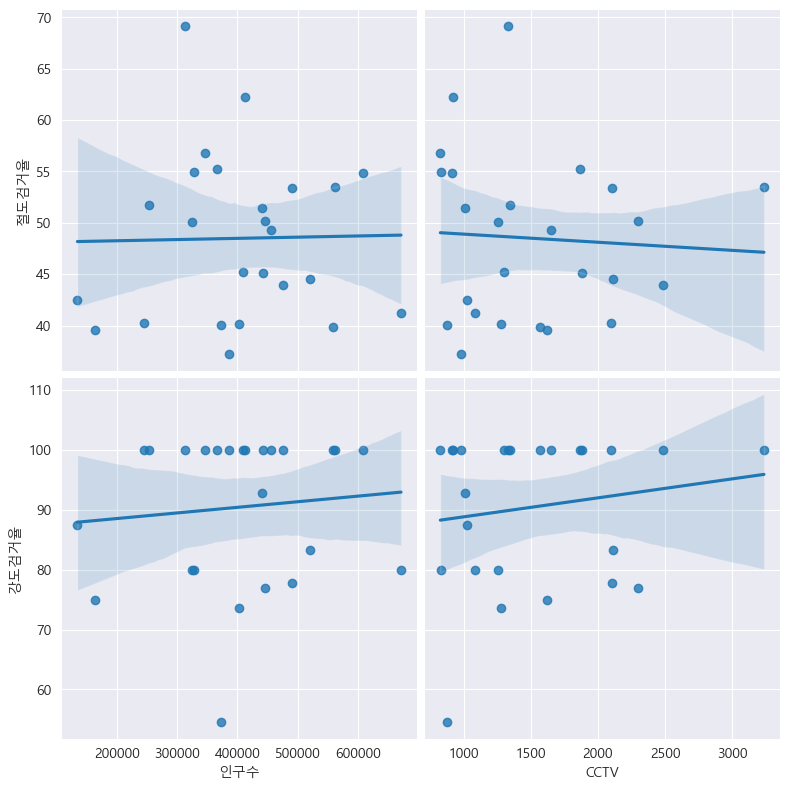

In [36]:
def drawGraph():
    sns.pairplot(
        data=crime_anal_norm, 
        x_vars=["인구수", "CCTV"],
        y_vars=["절도검거율", "강도검거율"],
        kind="reg",
        height=4
    )
    plt.show()
drawGraph()


- 해석1-1. CCTV가 증가할수록 절도검거율이 감소하고 있다. 
- 해석2-1. CCTV가 증가할수록 강도검거율은 증가하고 있다. 

### 🔰 검거율 heatmap

> 전체 검거율의 대표값인 "검거" 컬럼을 기준으로 정렬한 후 heatmap으로 전체 데이터의 흐름을 본다.

- 검거율이 높은 곳을 보면, 강남3구가 없다.

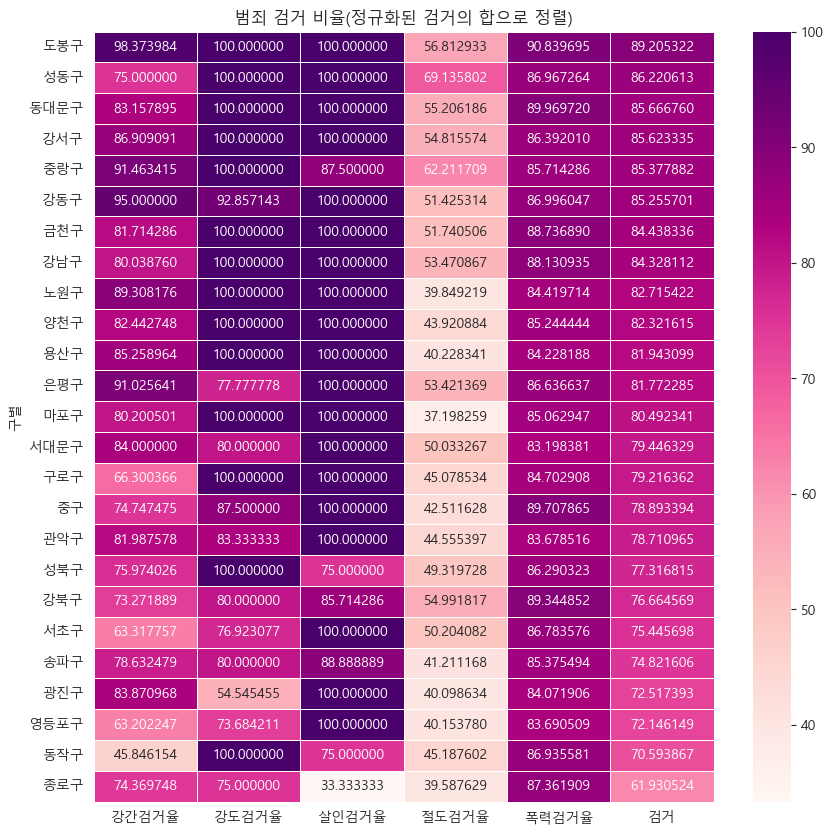

In [38]:
def drawGraph():
    
    # DataFrame 생성
    target_col = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율", "검거"]
    crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거", ascending=False) # 내림차순
    
    # 그래프 설정
    plt.figure(figsize=(10, 10))
    sns.heatmap(
		data=crime_anal_norm_sort[target_col],
		annot=True, # 데이터값 표현
		fmt="f", # f: 실수, d: 정수
		linewidths=0.5, # 간격설정
		cmap="RdPu"
	)
    plt.title("범죄 검거 비율(정규화된 검거의 합으로 정렬)")
    plt.show()
    
drawGraph()

### 🔰 범죄발생 건수 heatmap

> 범죄발생 건수의 대표값인 "범죄" 컬럼을 기준으로 정렬한다.

- 강남구는 살인을 제외하면, 전부 1등 
- 서초구도 상위권에 속함
- 검거율은 낮은데, 범죄 발생 비율이 높다. 
- 강남 송파 서초구가 과연 안전할까? 라는 의문을 계속 가질 수 있음

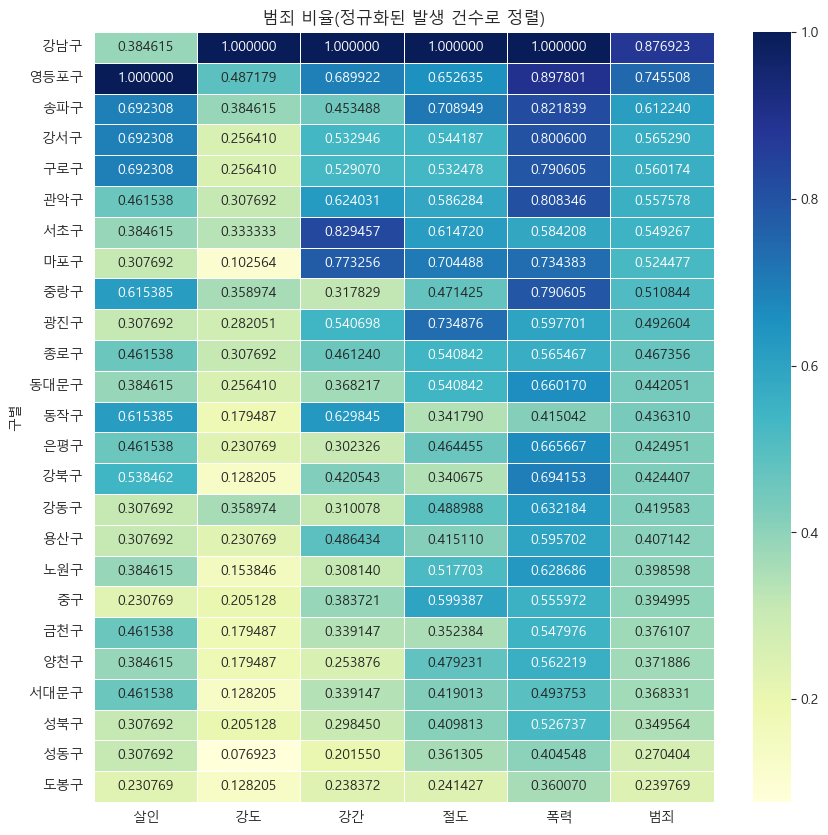

In [39]:
def drawGraph():
    
    # DataFrame 생성 
    target_col = ["살인", "강도", "강간", "절도", "폭력", "범죄"]
    crime_anal_norm_sort = crime_anal_norm.sort_values(by="범죄", ascending=False) # 내림차순 
    
    # 그래프 설정
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        data=crime_anal_norm_sort[target_col],
        annot=True, # 데이터값 표현 
        fmt="f", # 실수값으로 표현
        linewidths=0.5, # 간격설정
        cmap="YlGnBu",
    )
    plt.title("범죄 비율(정규화된 발생 건수로 정렬)")
    plt.show()
    
drawGraph()

In [44]:
crime_anal_norm.to_csv("./result_data/06_crime_in_seoul_final.csv", encoding="utf-8")